<a href="https://colab.research.google.com/github/Himnshii/Machine-Learning/blob/main/celebal_assignment_7/Gallstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
xixama_gallstone_dataset_uci_path = kagglehub.dataset_download('xixama/gallstone-dataset-uci')

print('Data source import complete.')


Data source import complete.


<h1 style="
  display: inline-block;
  padding: 15px 30px;
  background: linear-gradient(to right, #4A90E2, #357ABD);
  color: white;
  font-size: 24px;
  font-weight: bold;
  border-radius: 50px;
  box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
">
            Predicting Gallstone Status Using Clinical and Bioimpedance Features
</h1>

# Objective:
The purpose is to build a logistic regression model that has the capability for predicting gallstones,
using clinical and bioimpedance features

# Dataset Overview
The clinical dataset was collected from the Internal Medicine Outpatient Clinic of Ankara VM Medical Park Hospital and includes data from 319 individuals (June 2022–June 2023), 161 of whom were diagnosed with gallstone disease. It contains 38 features, including demographic, bioimpedance, and laboratory data, and was ethically approved by the Ankara City Hospital Ethics Committee (E2-23-4632). Demographic variables are age, sex, height, weight, and BMI. Bioimpedance data includes total, extracellular, and intracellular water; muscle and fat mass; protein; visceral fat area; and hepatic fat. Laboratory features are glucose, total cholesterol, HDL, LDL, triglycerides, AST, ALT, ALP, creatinine, GFR, CRP, hemoglobin, and vitamin D. The dataset is complete, with no missing values, and balanced in terms of disease status, eliminating the need for additional preprocessing. It provides a strong foundation for machine learning-based gallstone prediction using non-imaging features.

<div style="background: linear-gradient(to right, #a1c4fd, #c2e9fb);
            padding: 11px; border-radius: 12px; box-shadow: 2px 2px 12px rgba(0,0,0,0.1);
            font-size: 22px; font-weight: bold; color: #003366; text-align: center;">
  FEATURES
</div>

Age: Age of the patient (in years).

Gender: Biological sex of the patient (Male/Female).

BMI: Body Mass Index calculated using weight and height (kg/m²).

Cholesterol: Total blood cholesterol level (mg/dL).

Triglycerides: Triglyceride concentration in blood (mg/dL).

Diabetes: Indicates whether the patient has diabetes (Yes/No).

Hypertension: Indicates presence of high blood pressure (Yes/No).

Alcohol_Consumption: Alcohol usage level (None, Occasional, Frequent).

Smoking_Status: Smoking behavior (Never, Former, Current).

Physical_Activity: Level of physical activity (Low, Moderate, High).

Blood_Pressure: Systolic/diastolic blood pressure (mmHg).

Blood_Sugar: Blood glucose concentration (mg/dL).

HDL: High-density lipoprotein cholesterol (mg/dL).

LDL: Low-density lipoprotein cholesterol (mg/dL).

Waist_Circumference: Circumference of waist (in cm), indicating central obesity.

Family_History: Family history of gallstones (Yes/No).

Diet_Pattern: Type of diet (High-fat, Balanced, Low-fat).

Liver_Enzymes: Liver function enzyme levels (ALT, AST; U/L).

Gallbladder_Wall_Thickness: Measured thickness of the gallbladder wall (mm).

Stone_Size: Diameter of the largest gallstone found (mm).

Number_of_Stones: Count of gallstones detected.

Pain_Severity: Severity of abdominal pain (Mild, Moderate, Severe).

Pain_Frequency: Frequency of pain episodes per week.

Nausea: Whether nausea is reported (Yes/No).

Vomiting: Whether vomiting is reported (Yes/No).

Fever: Indicates presence of fever (Yes/No).

Jaundice: Indicates if patient exhibits signs of jaundice (Yes/No).

Abdominal_Tenderness: Whether abdominal tenderness was observed (Yes/No).

Murphy_Sign: Clinical indicator of gallbladder inflammation (Yes/No).

Ultrasound_Findings: Qualitative findings from ultrasound imaging.

CT_Scan_Result: CT scan diagnosis or observation notes.

MRCP_Result: Magnetic Resonance Cholangiopancreatography report.

ERCP_Done: Indicates if Endoscopic Retrograde Cholangiopancreatography was done (Yes/No).

Surgery_Recommended: Whether surgery was advised (Yes/No).

Surgery_Performed: Whether surgery was performed (Yes/No).

Medication_Type: Type of medication prescribed, if any.

Followup_Required: Indicates if follow-up care was needed (Yes/No).

Followup_Outcome: Summary of patient status after follow-up.

Gallstones: Target variable, indicates presence of gallstones (1 = Yes, 0 = No).


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle

import warnings
warnings.filterwarnings('ignore')

# Data ingestion

In [ ]:
df = pd.read_csv("/content/gallstone_.csv")
print("Successfully_loaded")

Successfully_loaded


# Data Exploration

## How does our data look like..?

In [ ]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


## Shape and Size...?

In [ ]:
rows, cols = df.shape
print(f"{rows} rows and {cols} cols")
print(f'Size:{df.size}')

319 rows and 39 cols
Size:12441


## Columns and their info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

## Summary Statistics

In [ ]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [ ]:
df.groupby('Gallstone Status').mean()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,,,,,,,,,,,,,,,,,,,,,
0,47.633540,0.416149,0.360248,0.055901,0.037267,0.000000,0.099379,168.229814,79.808696,28.238509,...,46.695652,149.424783,23.913043,28.012422,70.484472,0.823696,101.293545,0.462174,14.763975,24.904969
1,48.512658,0.569620,0.310127,0.018987,0.018987,0.050633,0.170886,166.063291,81.335443,29.527848,...,52.308228,139.486076,19.414557,25.677215,75.790506,0.777089,100.335249,3.271962,14.065823,17.831329


**Since there are no null values, we can move ahead with EDA (exploratory data analysis).**

# EDA

<h1 style="
  display: inline-block;
  width: 90%;
  padding: 30px 30px;
  background: linear-gradient(to right, #6EC6FF, #4A90E2); /* Soft blue gradient */
  color: white;
  font-size: 24px;
  font-weight: bold;
  border-radius: 12px;
  box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
  text-align: center;
">
 EDA(Exploratory Data Analysis)
</h1>

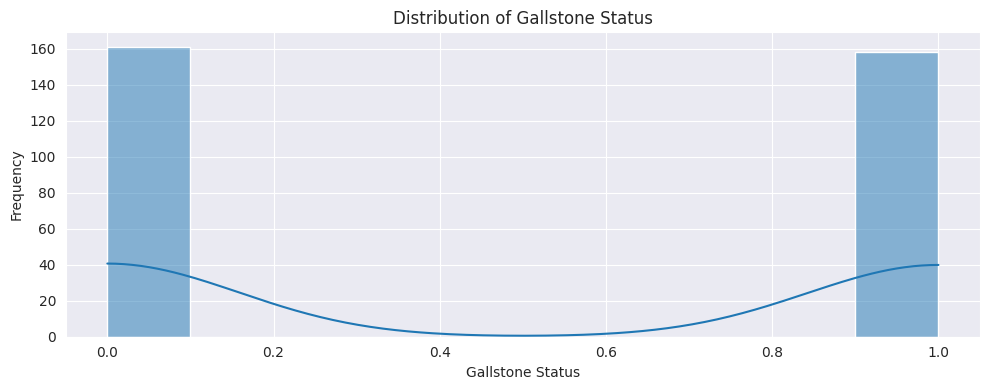

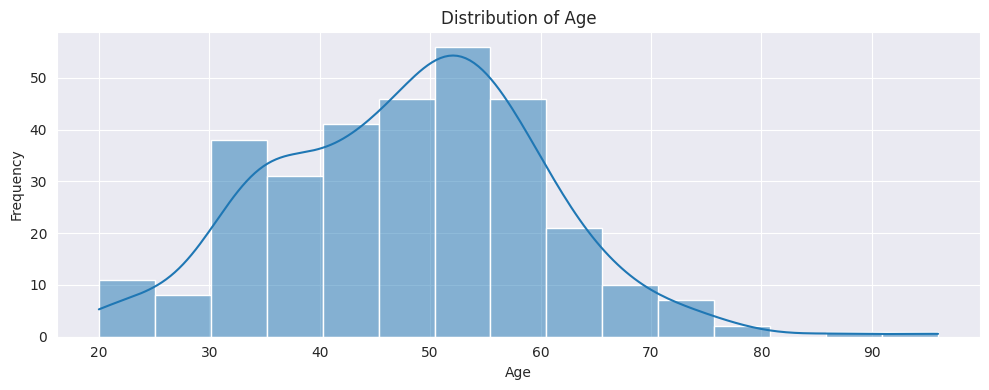

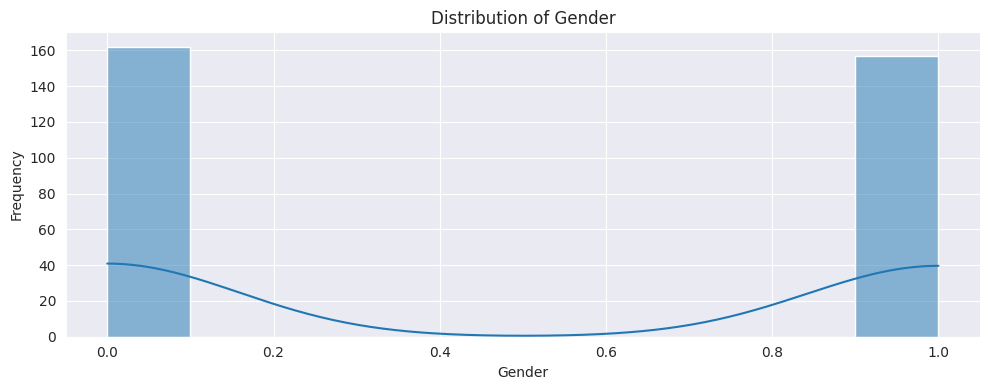

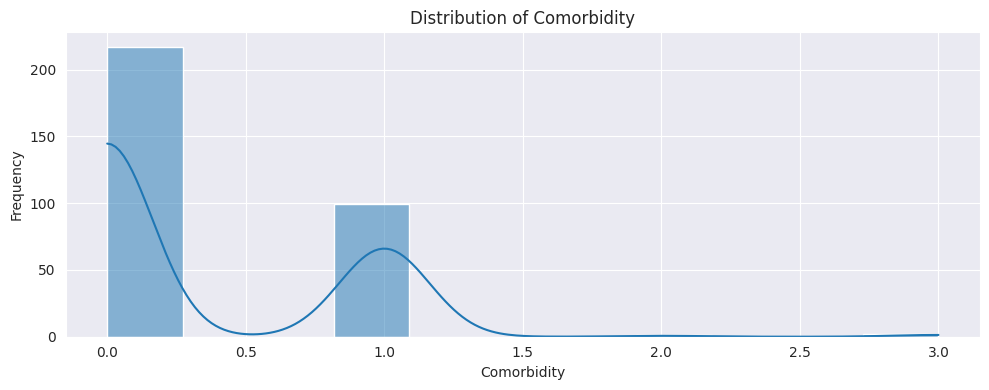

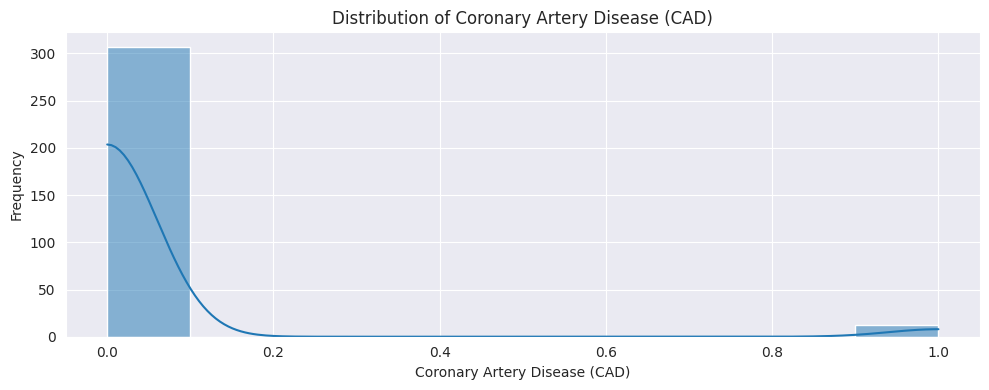

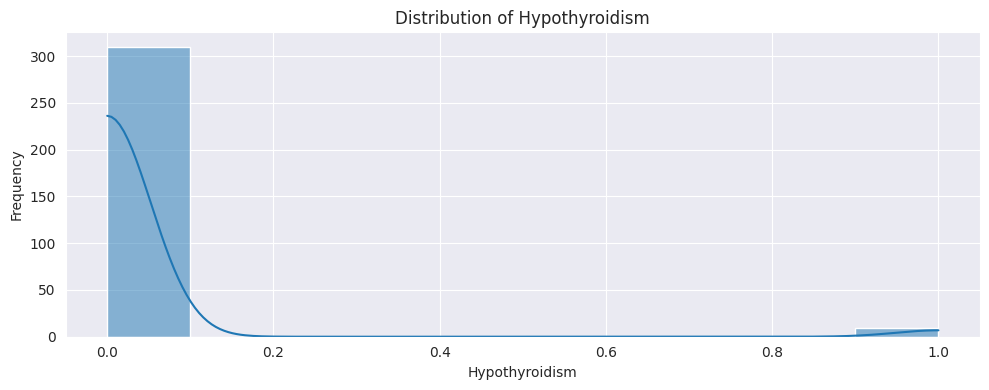

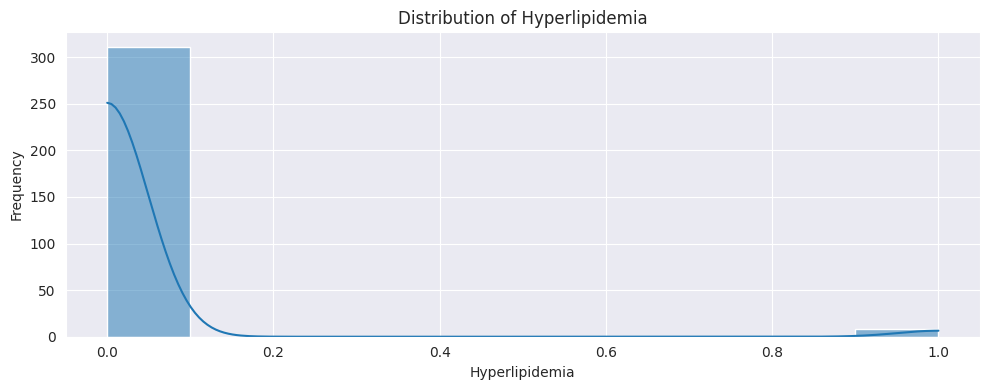

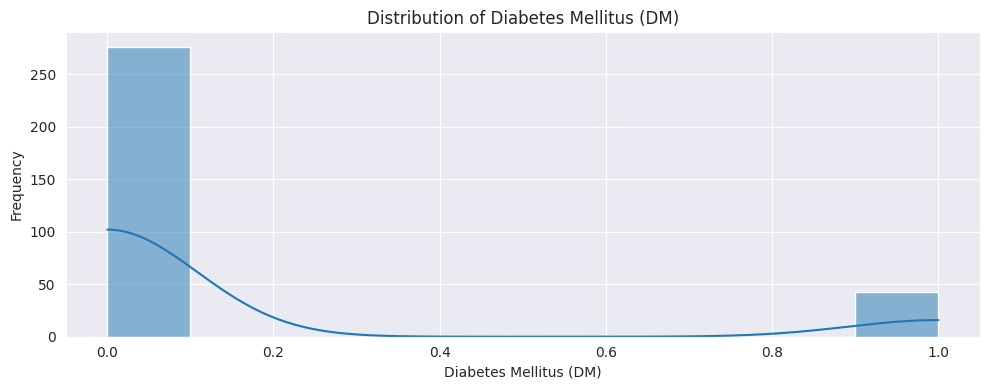

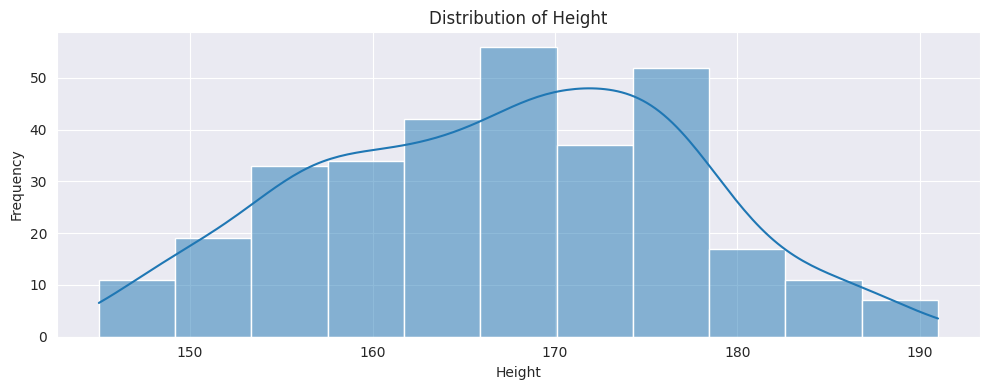

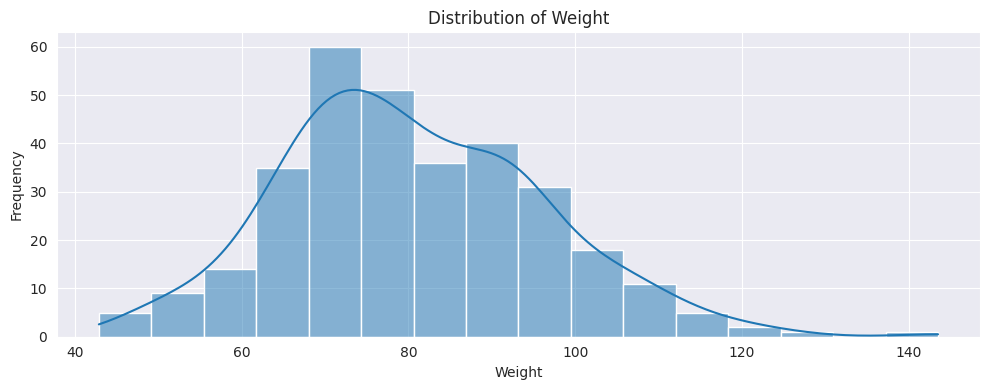

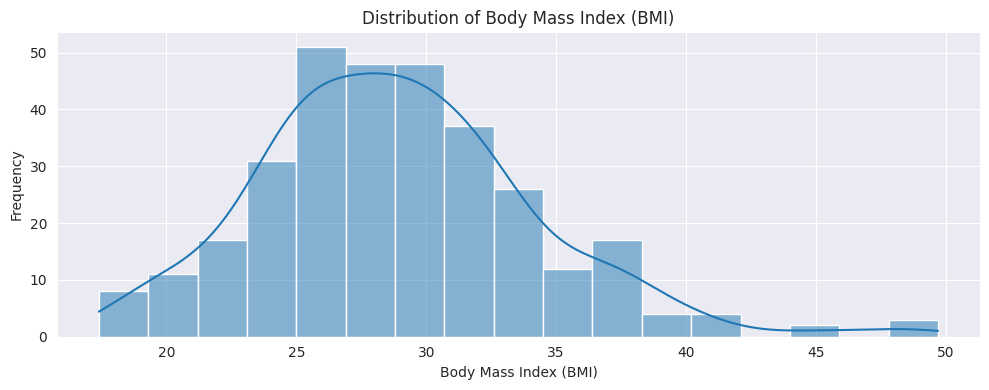

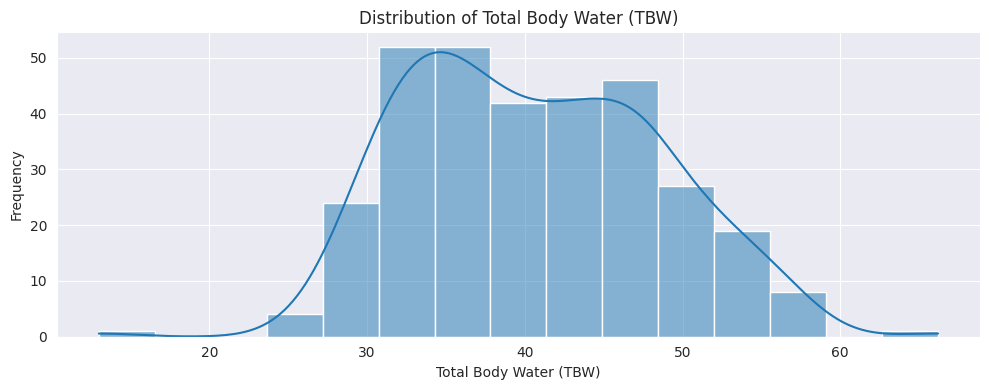

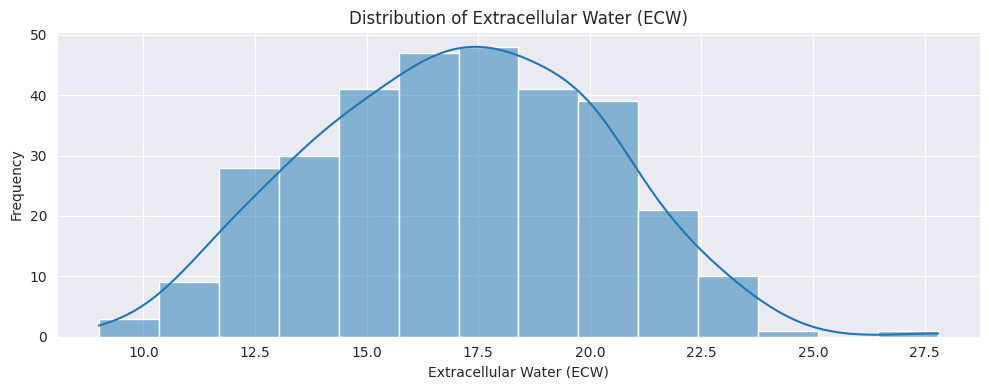

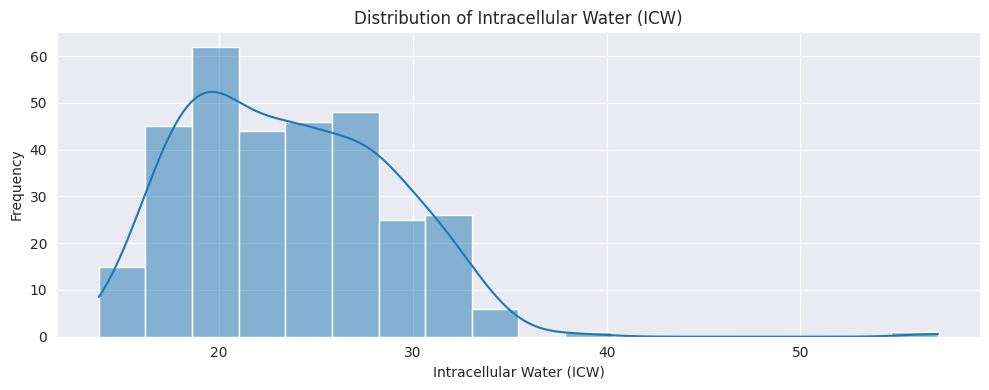

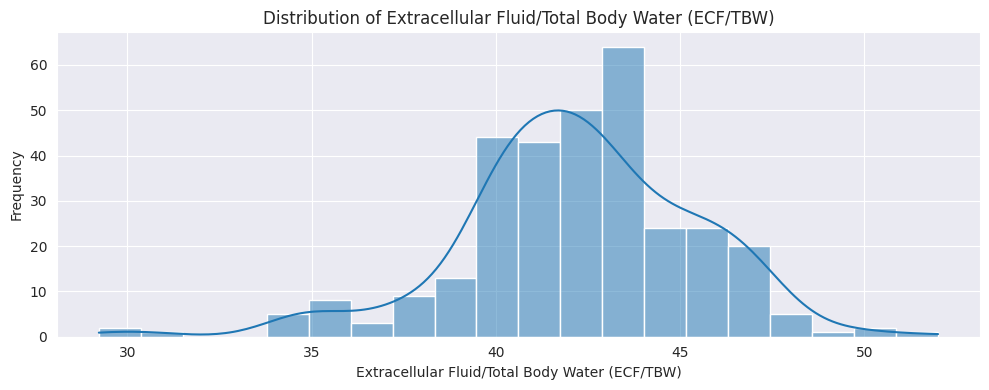

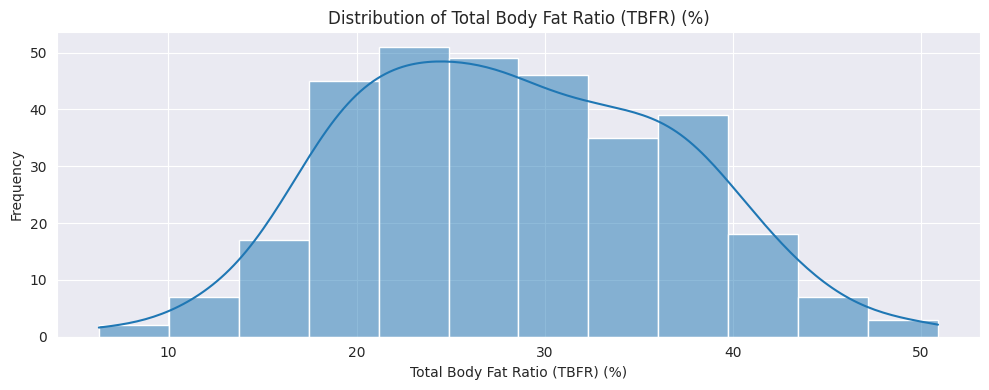

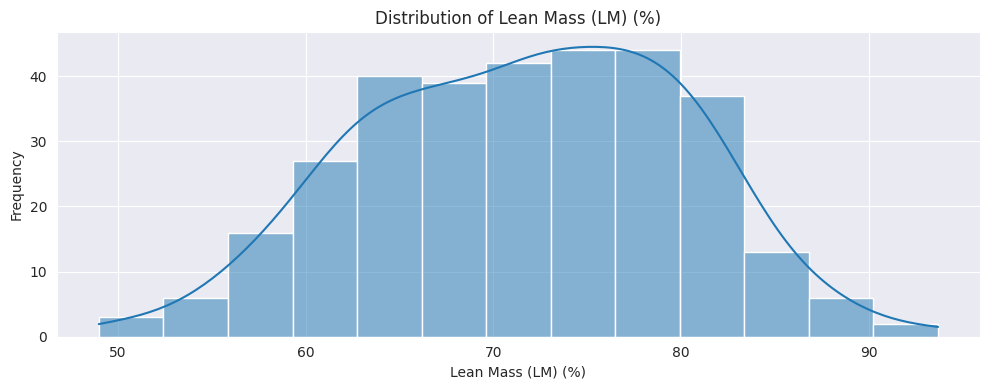

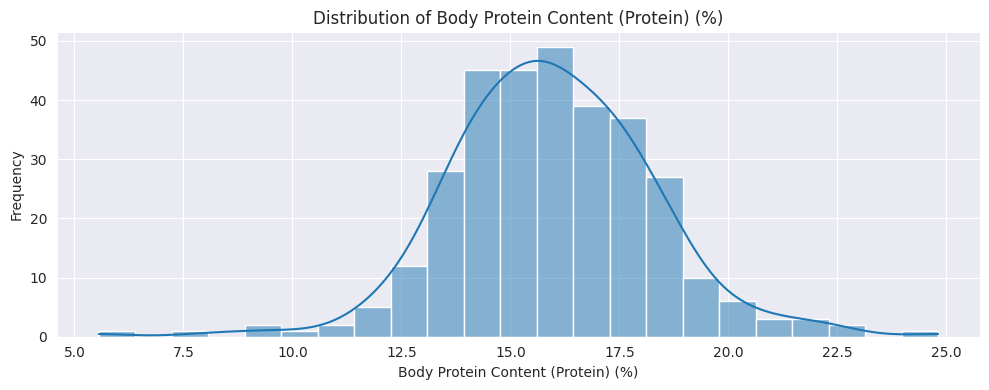

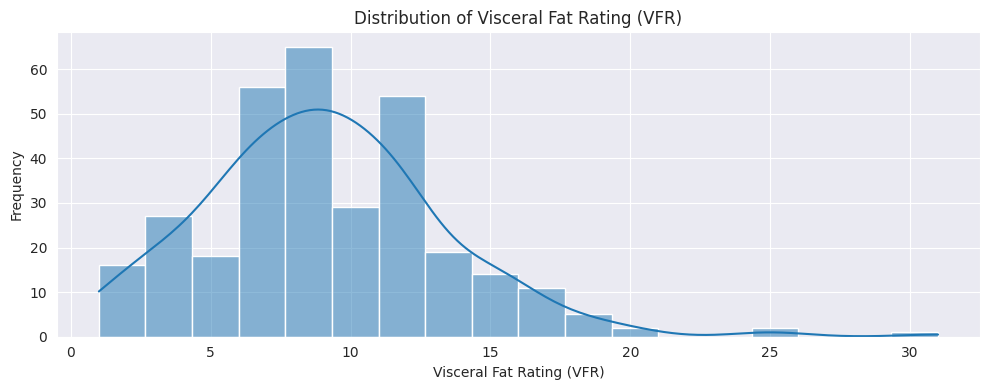

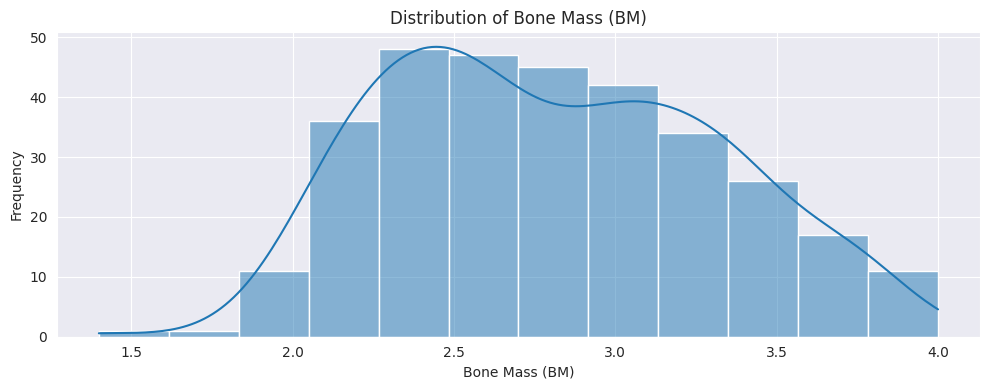

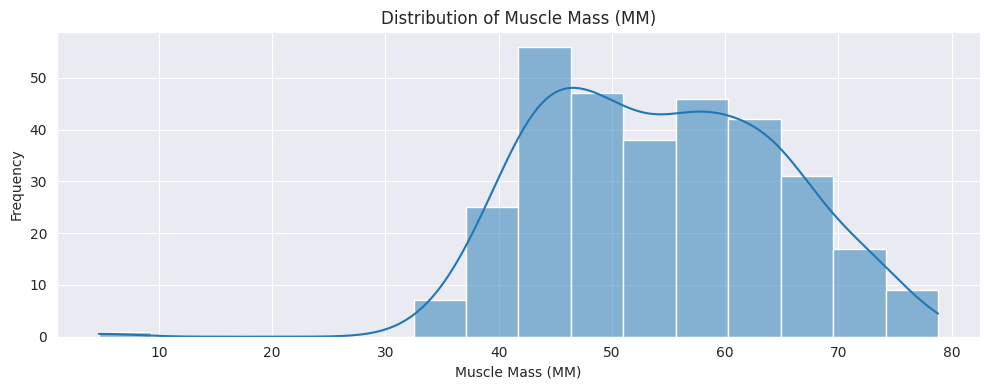

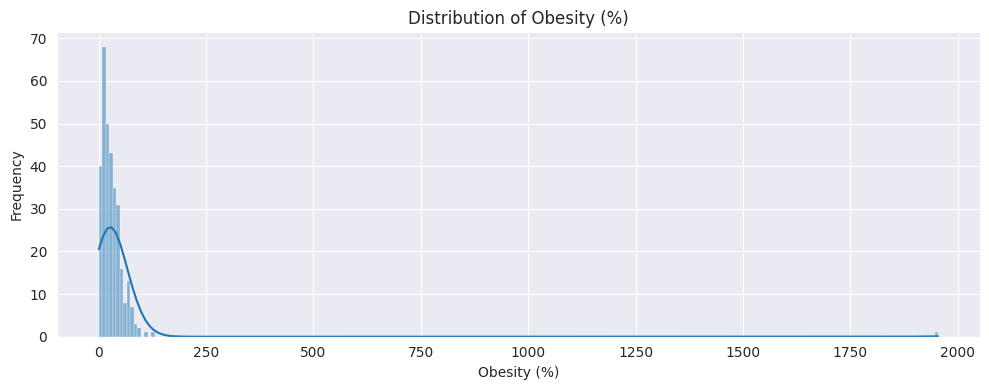

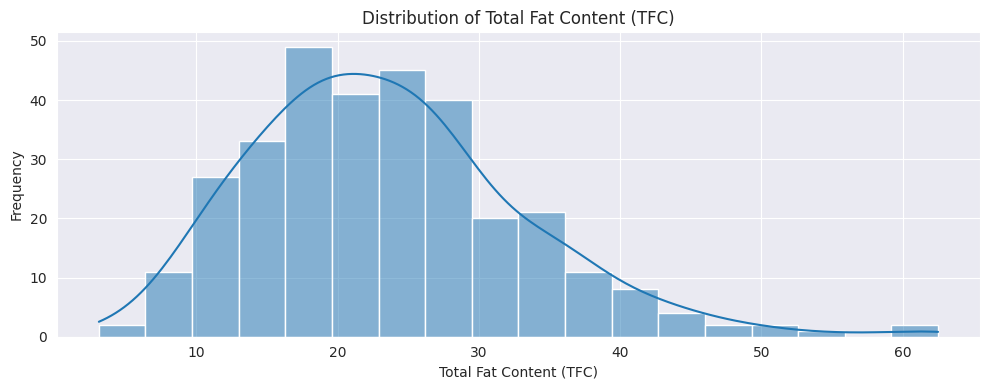

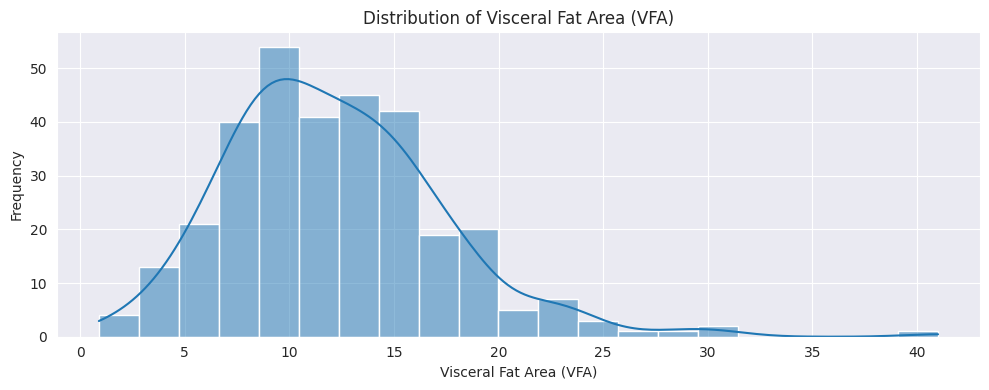

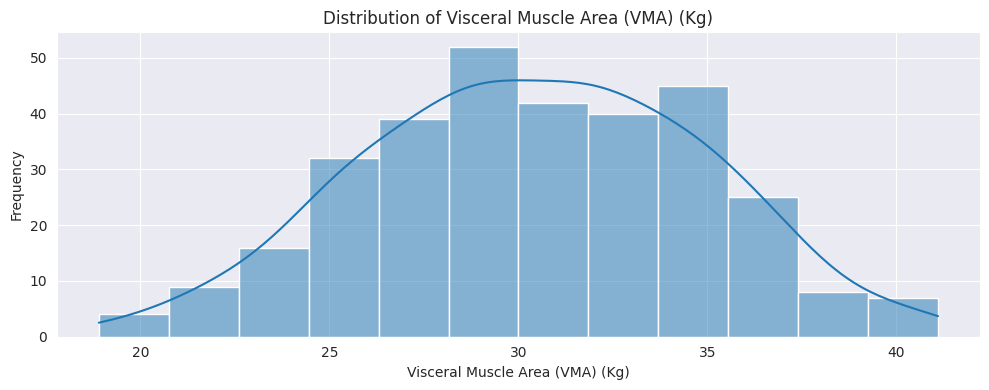

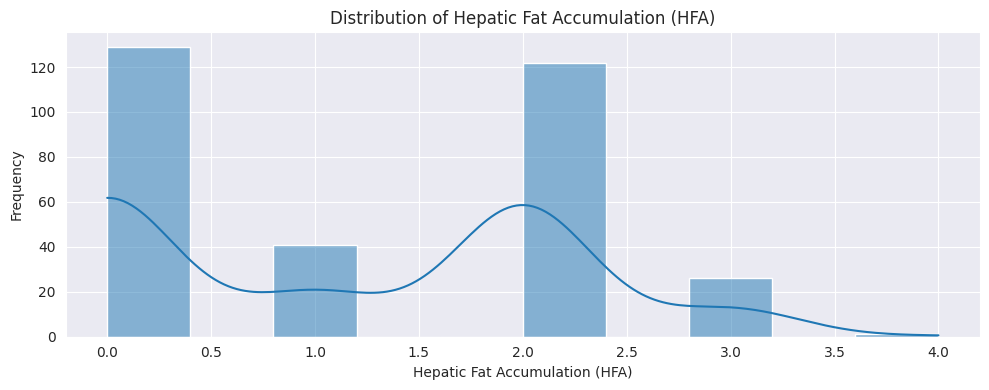

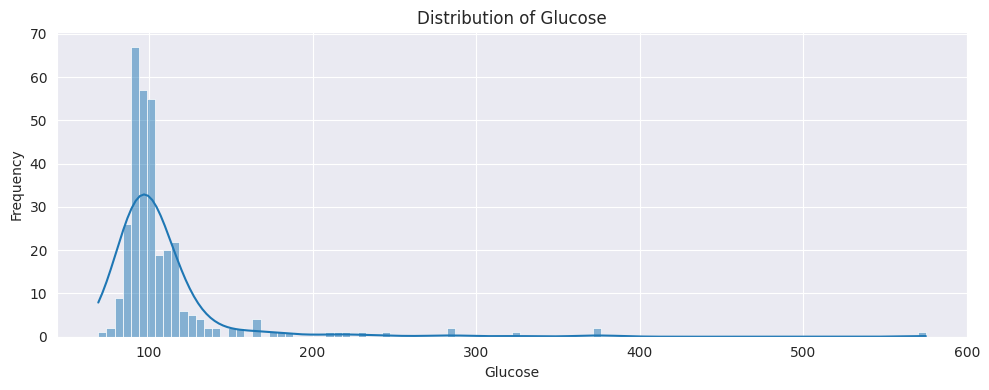

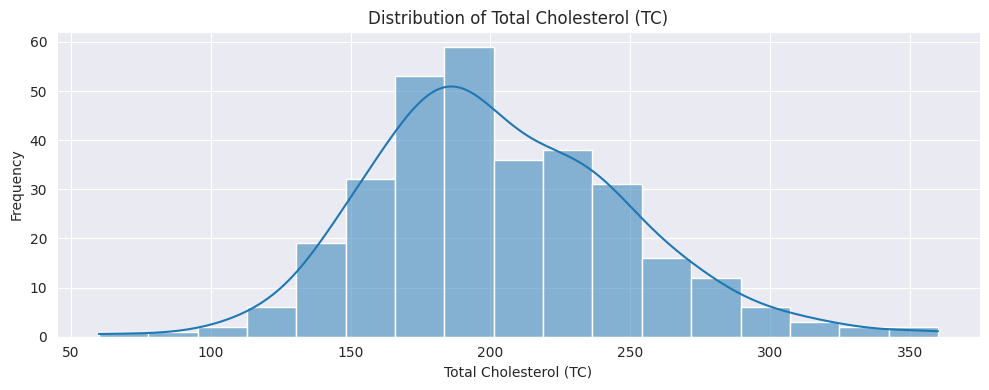

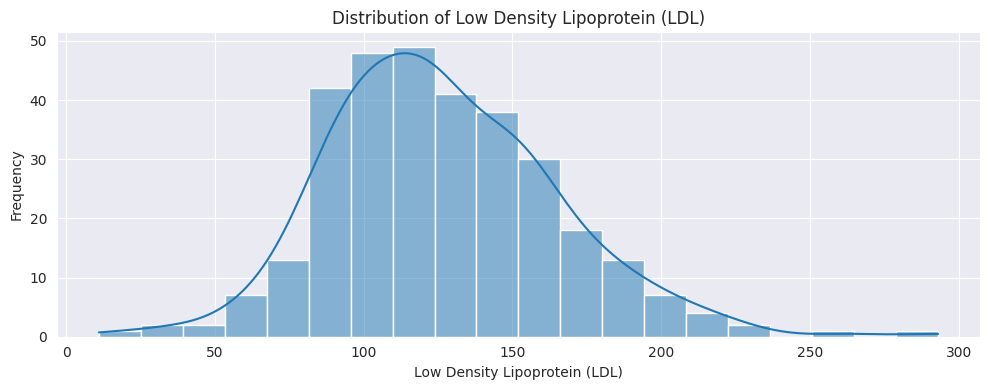

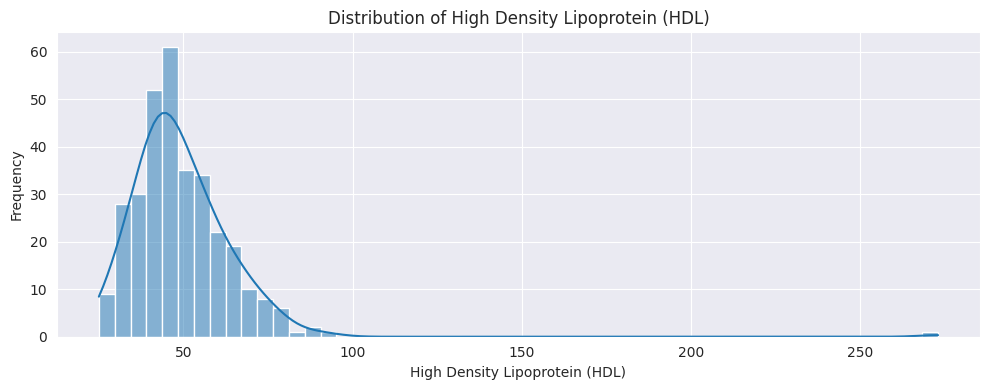

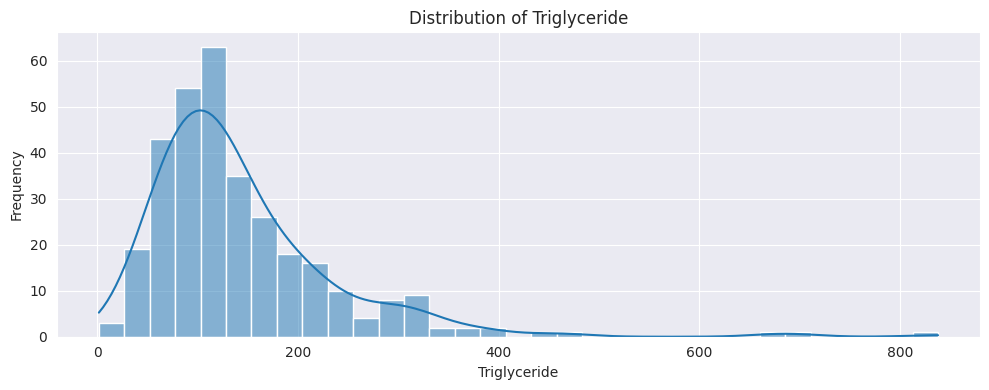

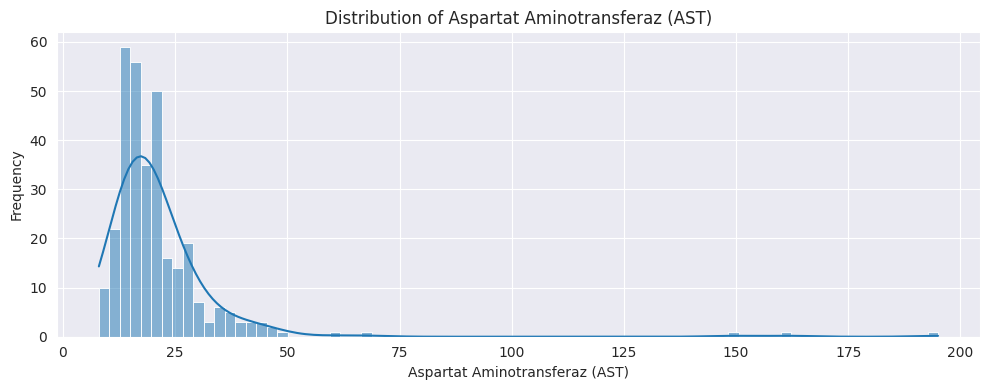

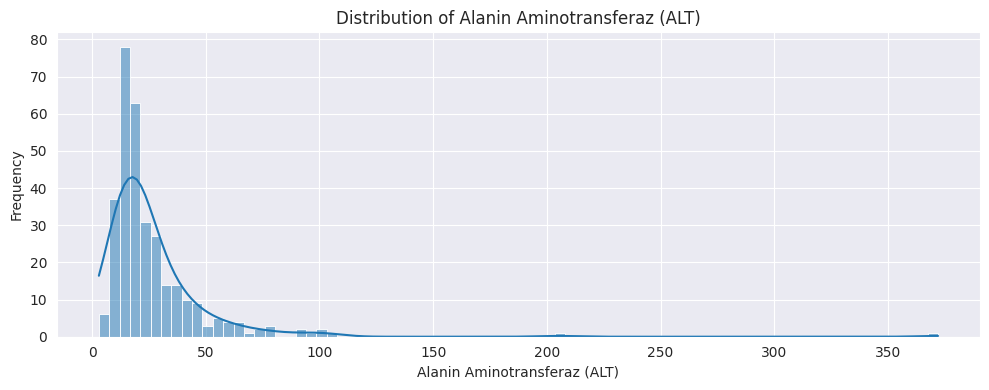

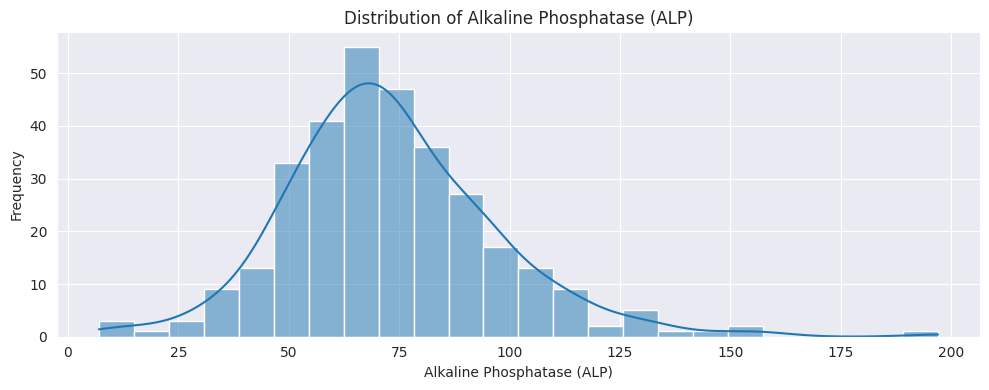

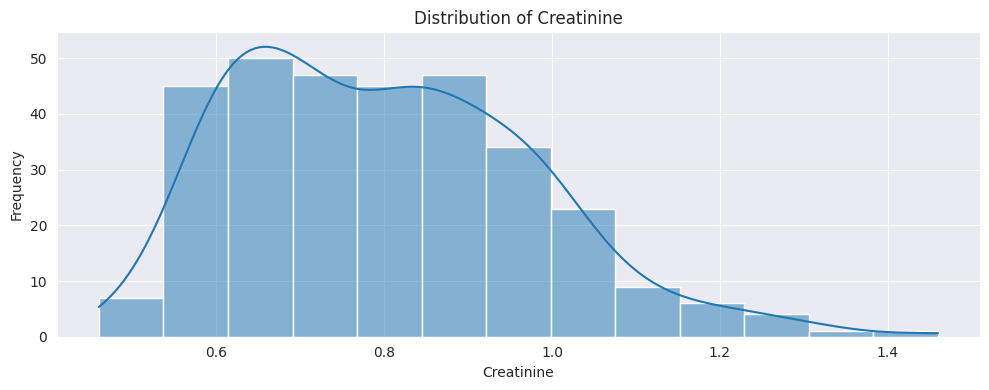

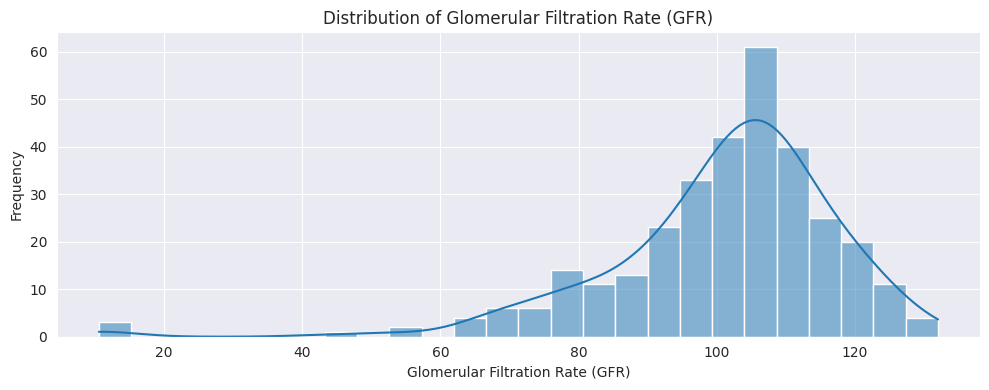

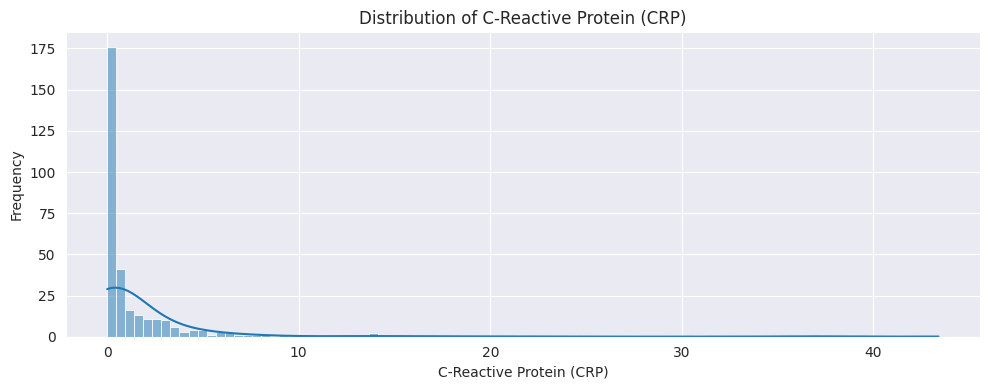

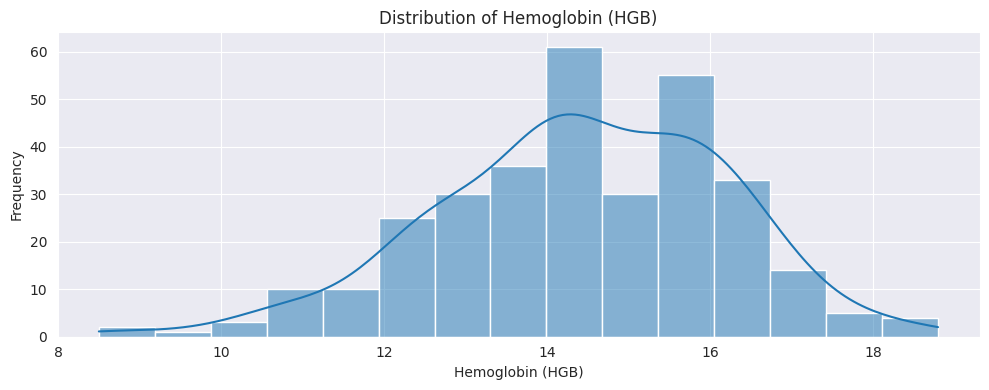

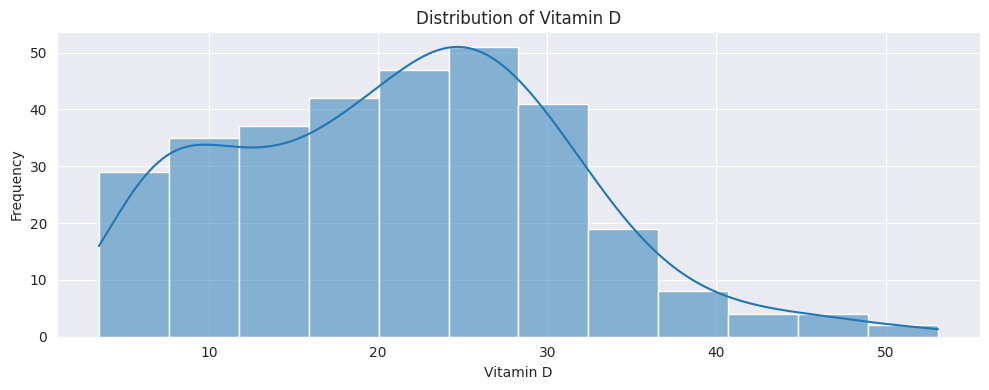

In [ ]:
num_col = df.select_dtypes("number")
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Gender Contribution on Disease

In [ ]:
gen_c  = df.groupby('Gallstone Status')['Gender'].value_counts(normalize=True)*100
gen_c = gen_c.reset_index()
gen_c['Gallstone Status'] = gen_c['Gallstone Status'].map({0: 'Yes', 1: 'No'})
gen_c

,Gallstone Status,Gender,proportion
0,Yes,0,58.385093
1,Yes,1,41.614907
2,No,1,56.962025
3,No,0,43.037975


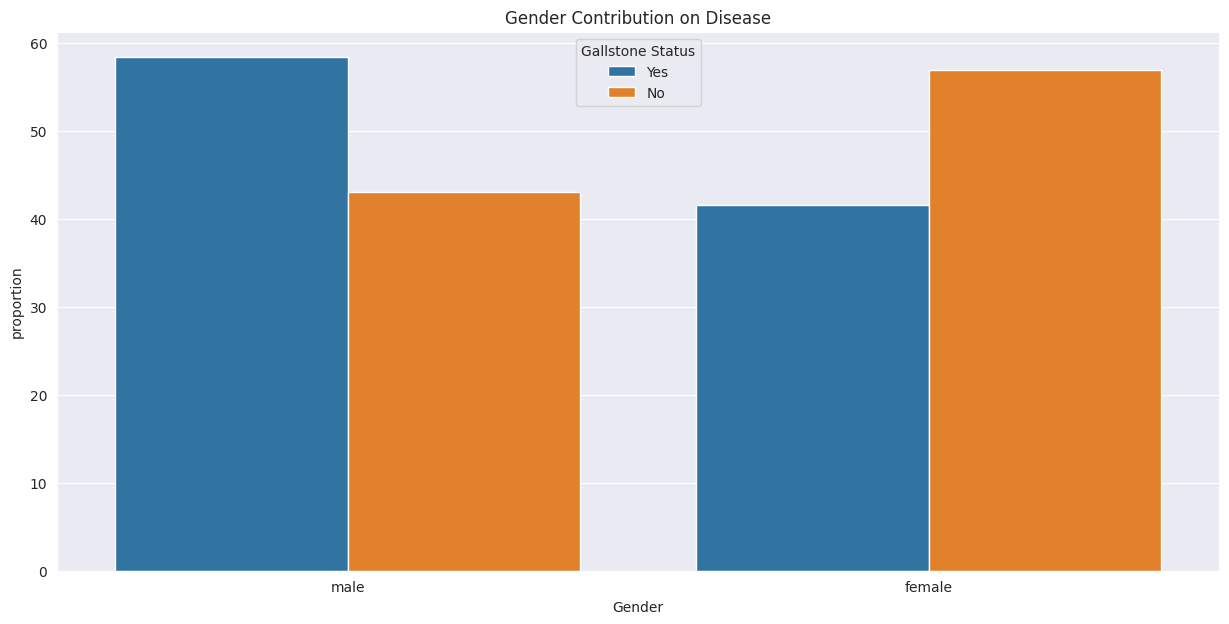

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(data=gen_c,x='Gender',y='proportion', hue='Gallstone Status')
plt.title("Gender Contribution on Disease")
plt.xticks([0, 1], ['male', 'female'])
plt.show()

**Among people without gallstones, males dominate (58.39%).**

**Among those with gallstones, females slightly dominate (56.96%).**

## Age range Contribution to Disease...?

In [ ]:
df['Age'].describe()

,Age
count,319.000000
mean,48.068966
std,12.114558
min,20.000000
25%,38.500000
50%,49.000000
75%,56.000000
max,96.000000


In [ ]:
df_1 = df.copy()
bins = [20, 38.5, 49, 56, 96]
labels = ['teen','young adults', 'adults', 'senior citizen']
df_1['age_labeled'] = pd.cut(df_1['Age'], bins=bins, labels=labels)

In [ ]:
df_1.groupby('age_labeled')['Gallstone Status'].value_counts(normalize=True)

age_labeled     Gallstone Status
teen            0                   0.513158
                1                   0.486842
young adults    0                   0.506173
                1                   0.493827
adults          0                   0.517647
                1                   0.482353
senior citizen  1                   0.534247
                0                   0.465753
Name: proportion, dtype: float64

In [ ]:
df_1.groupby('age_labeled')['Gallstone Status'].mean()

,Gallstone Status
age_labeled,
teen,0.486842
young adults,0.493827
adults,0.482353
senior citizen,0.534247


In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_1['age_labeled'], df_1['Gallstone Status'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.9166546057404052


**there's no strong evidence that suggests age group affects Gallstone Status**

## Significance of BMI

**Finding Relationship with BMI**

In [ ]:
df_1.groupby('Gallstone Status')['Body Mass Index (BMI)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gallstone Status,,,,,,,,
0,161.0,28.238509,5.290523,17.4,24.800,27.70,31.400,49.7
1,158.0,29.527848,5.274610,18.8,26.025,29.15,32.475,48.2


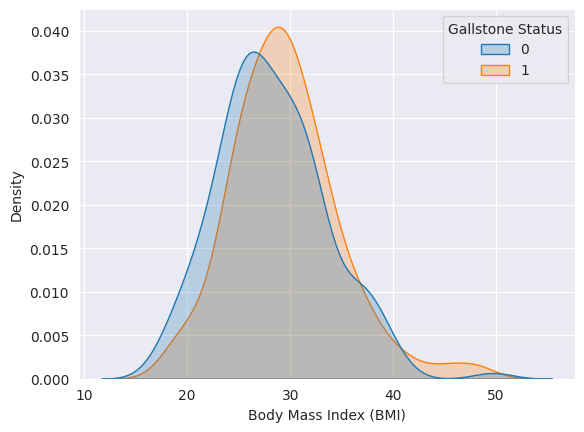

In [ ]:
sns.kdeplot(data=df_1, x='Body Mass Index (BMI)', hue='Gallstone Status', fill=True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind
bmi_gallstone = df[df['Gallstone Status'] == 1]['Body Mass Index (BMI)']
bmi_no_gallstone = df[df['Gallstone Status'] == 0]['Body Mass Index (BMI)']

t_stat, p_val = ttest_ind(bmi_gallstone, bmi_no_gallstone)
print(f"t-stat: {t_stat:.3f}, p-value: {p_val:.5f}")

t-stat: 2.180, p-value: 0.03003


**Since the p-value is 0.03003, we can conclude that there is significance that bmi does affect disease**

## Heatmap

In [ ]:
# let's have some relationship plotted
df_corr = df.corr()
df_corr.style.background_gradient("coolwarm")

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,1.000000,0.036339,0.153483,-0.048516,-0.096998,-0.055196,0.161901,0.104689,-0.107919,0.048669,0.121507,-0.111233,-0.178436,-0.035274,-0.169826,0.225470,-0.225749,-0.086424,0.018288,-0.216570,-0.093297,0.053920,0.170158,0.140397,-0.072989,0.090268,-0.011498,0.014100,-0.056469,0.158622,-0.050835,-0.134910,-0.041937,0.109882,-0.132283,-0.028276,0.281995,-0.196872,-0.354873
Age,0.036339,1.000000,0.086144,0.325447,0.129636,0.005289,0.015660,0.279302,-0.307407,0.040579,0.235835,-0.083263,0.008024,-0.198592,0.326685,0.243448,-0.243381,0.029040,0.531991,-0.080666,-0.101157,0.045473,0.195508,0.146932,-0.056233,0.167793,0.148504,0.159005,0.116587,0.103681,0.058043,-0.056930,-0.060163,0.121376,0.106190,-0.555640,-0.002826,-0.121711,0.057599
Gender,0.153483,0.086144,1.000000,-0.032308,-0.095766,0.135212,0.162919,-0.076437,-0.725667,-0.336012,0.125154,-0.740204,-0.698903,-0.733073,0.228835,0.620923,-0.623559,-0.357414,-0.328041,-0.664633,-0.742792,0.082191,0.290962,-0.089010,-0.640871,-0.098564,-0.104411,0.079499,-0.007075,0.370333,-0.209787,-0.228504,-0.310551,0.022681,-0.631499,0.024072,0.104154,-0.688754,-0.099308
Comorbidity,-0.048516,0.325447,-0.032308,1.000000,0.381961,0.219226,0.206355,0.525616,-0.073628,0.079539,0.128748,0.038178,0.113013,-0.035896,0.222294,0.099794,-0.093575,-0.018127,0.253402,0.078123,0.036220,0.095022,0.111799,0.091739,0.030590,0.188801,0.248475,0.087541,0.083620,-0.102534,0.172306,-0.045610,-0.021705,-0.073663,0.036678,-0.192767,-0.051218,-0.004605,0.074296
Coronary Artery Disease (CAD),-0.096998,0.129636,-0.095766,0.381961,1.000000,-0.033687,-0.031709,0.018451,0.051080,0.070927,0.035013,0.063354,0.091571,0.034815,0.074182,0.023606,-0.014157,0.004200,0.125916,0.086173,0.064929,-0.002448,0.039755,0.075075,0.058588,0.034186,0.118010,-0.111411,-0.085557,-0.071437,0.027974,-0.025911,-0.023239,-0.039137,0.038596,-0.036410,-0.039971,0.013770,-0.028182
Hypothyroidism,-0.055196,0.005289,0.135212,0.219226,-0.033687,1.000000,-0.027328,-0.011817,-0.070563,-0.004688,0.046768,-0.057123,-0.046420,-0.063132,0.034082,0.079524,-0.078081,-0.033130,-0.042477,-0.082984,-0.051782,-0.002806,0.050939,-0.010105,-0.039241,0.011560,0.013446,0.056996,0.003015,0.008262,0.046188,-0.020628,-0.031078,0.005479,-0.082271,0.001743,0.081460,-0.146965,0.057859
Hyperlipidemia,0.161901,0.015660,0.162919,0.206355,-0.031709,-0.027328,1.000000,-0.004601,-0.106368,-0.031597,0.038858,-0.105592,-0.047434,-0.132039,0.162791,0.141721,-0.140231,-0.114819,-0.039983,-0.091688,-0.107339,0.001810,0.098224,0.010025,-0.118602,0.090923,-0.027539,0.104894,0.108773,0.067083,-0.024615,-0.047476,-0.057498,-0.009051,-0.151923,0.054494,-0.018193,-0.182561,0.028342
Diabetes Mellitus (DM),0.104689,0.279302,-0.076437,0.525616,0.018451,-0.011817,-0.004601,1.000000,-0.081155,0.089725,0.144444,0.068894,0.104503,0.014295,0.112957,0.062750,-0.055031,-0.025276,0.292057,0.080457,0.055194,0.164420,0.110358,0.125796,-0.010817,0.238952,0.442663,0.053586,0.034338,-0.107639,0.208226,-0.073480,-0.038840,0.027056,0.016869,-0.137200,-0.024646,0.061703,0.032730
Height,-0.107919,-0.307407,-0.725667,-0.073628,0.051080,-0.070563,-0.106368,-0.081155,1.000

## Top 10 corr..?

In [ ]:
df_corr = pd.DataFrame(df.corr()['Gallstone Status'].sort_values(ascending=False).reset_index())
df_corr.columns = ['Feature','corr']
df_corr.head(15)

,Feature,corr
0,Gallstone Status,1.000000
1,C-Reactive Protein (CRP),0.281995
2,Total Body Fat Ratio (TBFR) (%),0.225470
3,Total Fat Content (TFC),0.170158
4,Hyperlipidemia,0.161901
5,High Density Lipoprotein (HDL),0.158622
6,Gender,0.153483
7,Visceral Fat Area (VFA),0.140397
8,Body Mass Index (BMI),0.121507
9,Alkaline Phosphatase (ALP),0.109882


In [ ]:
top_10 = df_corr['Feature'].head(10).to_list()
print(top_10, end=" ")

['Gallstone Status', 'C-Reactive Protein (CRP)', 'Total Body Fat Ratio (TBFR) (%)', 'Total Fat Content (TFC)', 'Hyperlipidemia', 'High Density Lipoprotein (HDL)', 'Gender', 'Visceral Fat Area (VFA)', 'Body Mass Index (BMI)', 'Alkaline Phosphatase (ALP)'] 

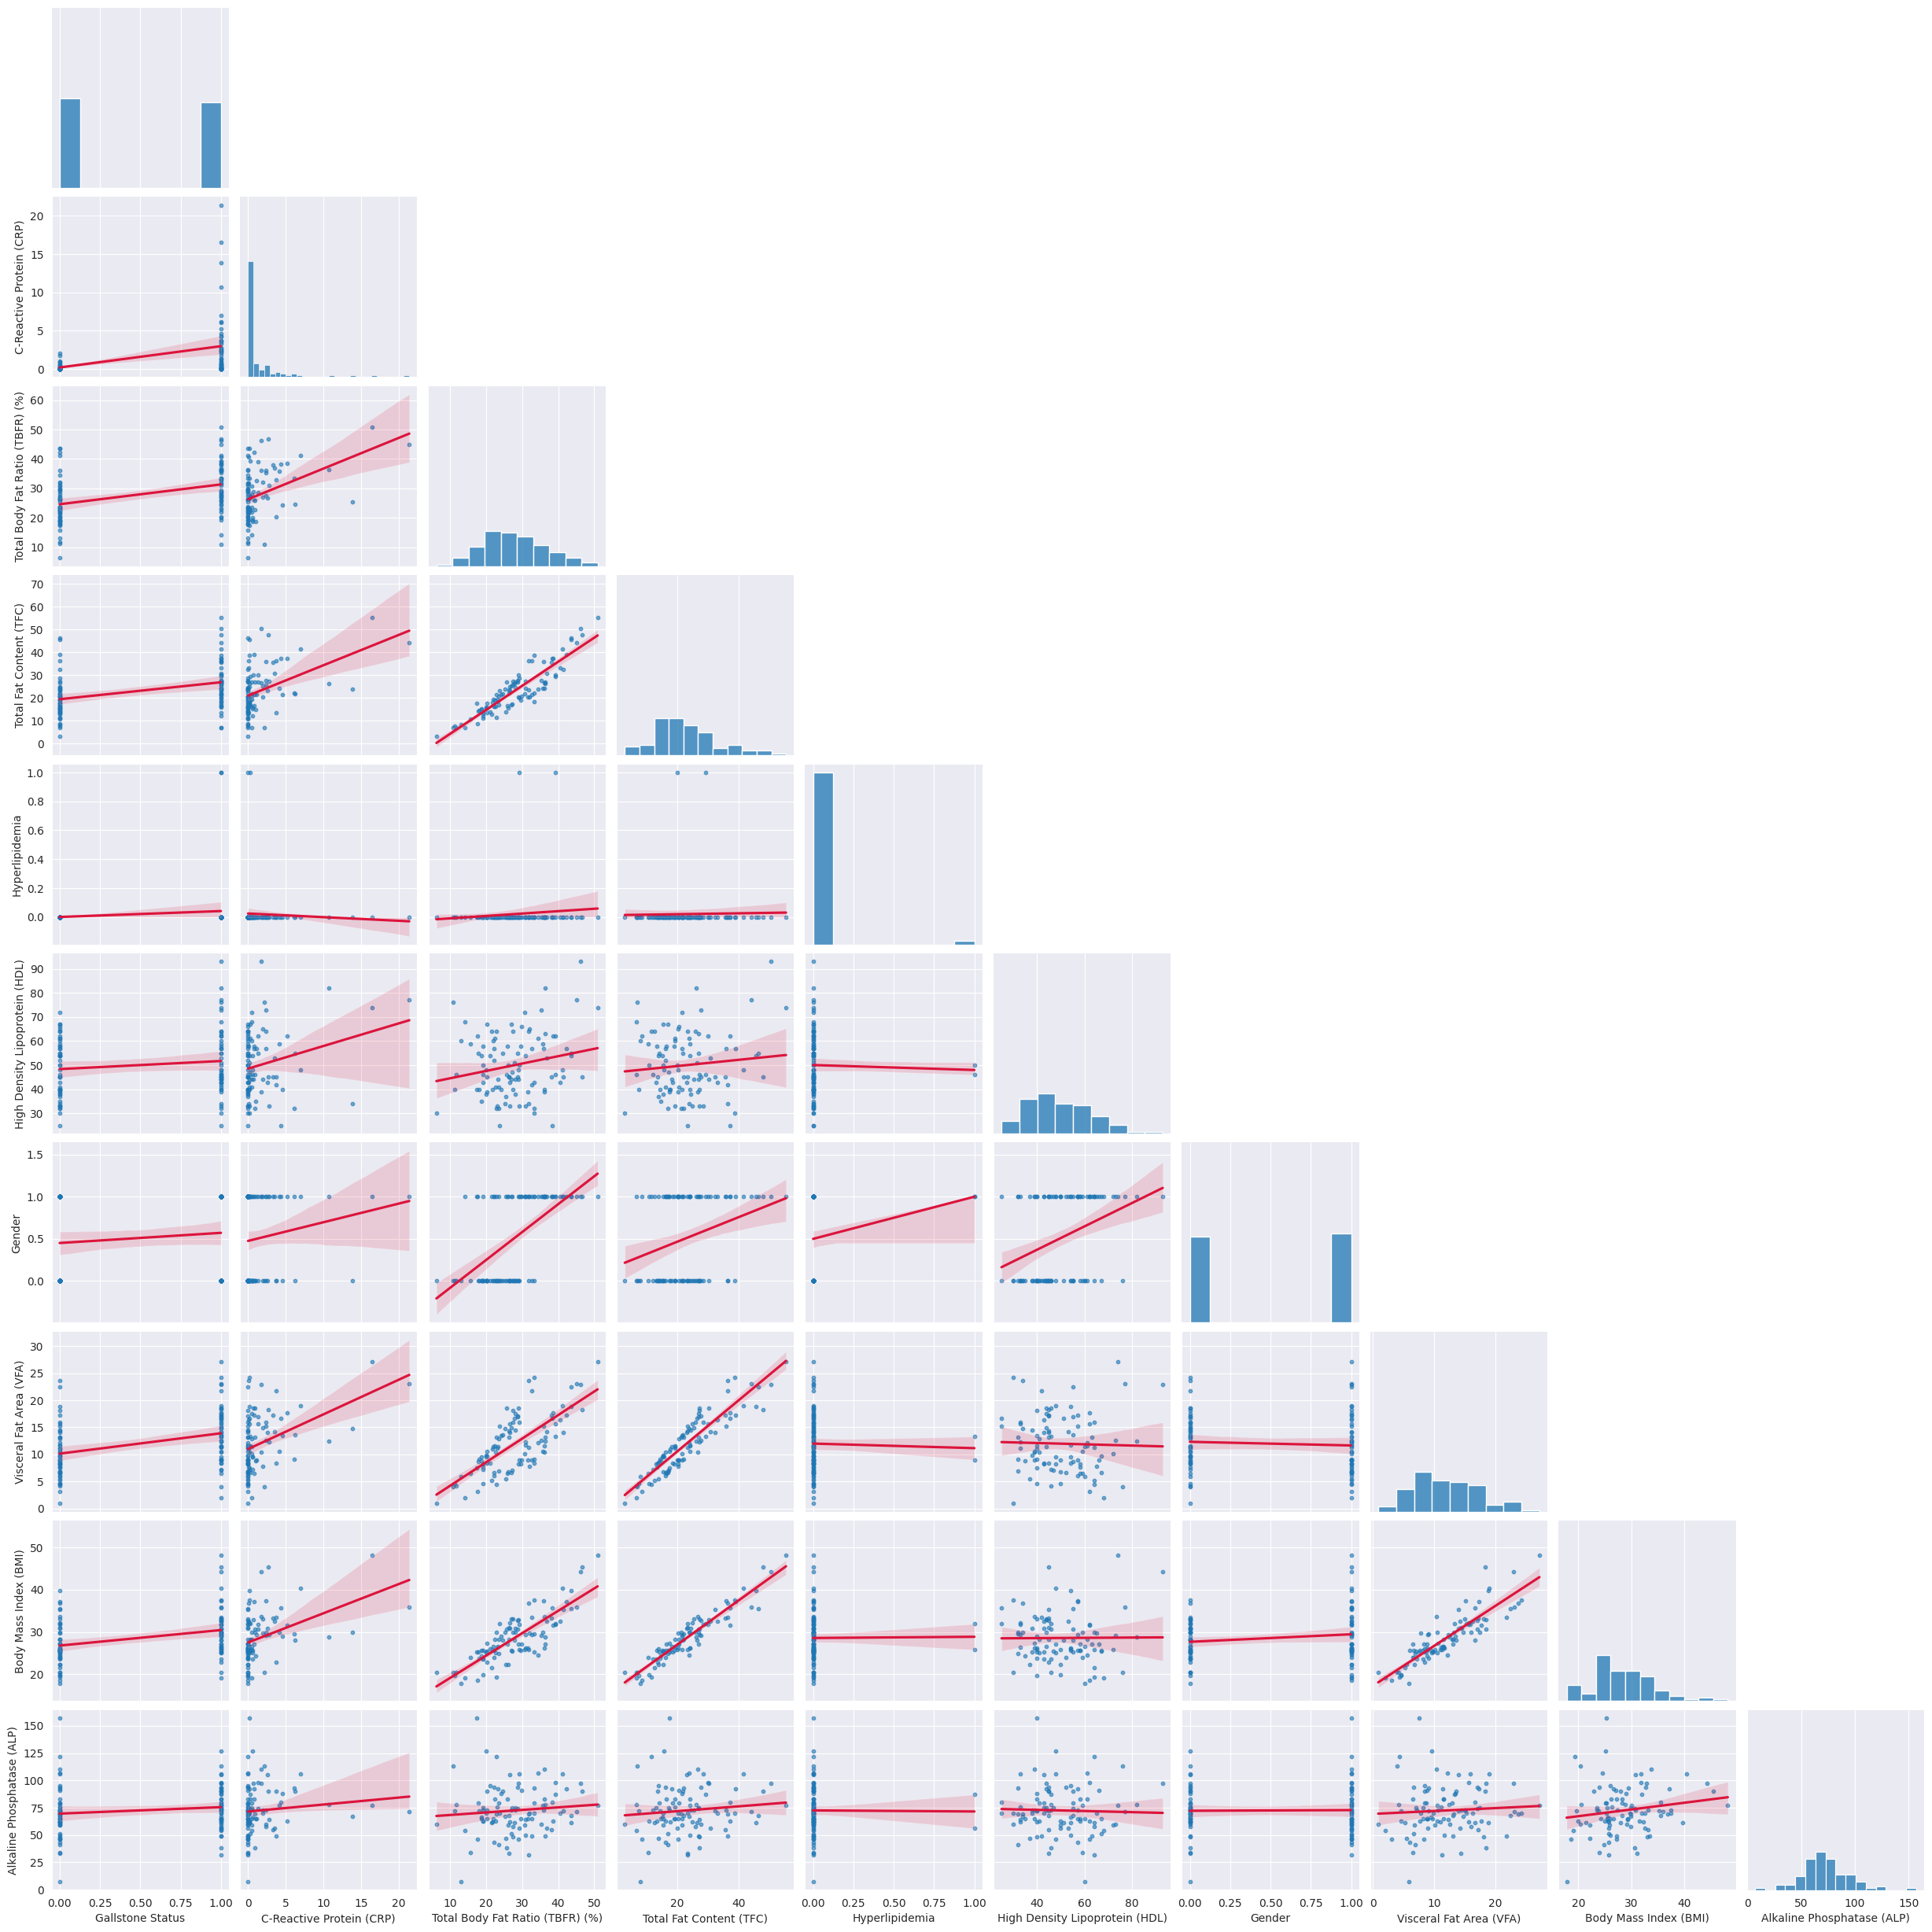

In [ ]:
%matplotlib inline
sns.pairplot(
    df[top_10].sample(100, random_state=42),
    kind='reg',
    corner=True,
    plot_kws={
        'line_kws': {'color': 'crimson'},
        'scatter_kws': {'alpha': 0.6, 's': 10}})
plt.show()

**Since we don't need to preprocess the data, we can move forward with Model training.**

# Modeling

<h1 style="
  display: inline-block;
  width: 90%;
  padding: 30px 30px;
  background: linear-gradient(to right, #6EC6FF, #4A90E2); /* Soft blue gradient */
  color: white;
  font-size: 24px;
  font-weight: bold;
  border-radius: 12px;
  box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
  text-align: center;
">
 Modeling and Evaluation
</h1>

## train_test_split

In [ ]:
x = df.drop("Gallstone Status", axis = 1)
y = df['Gallstone Status']

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Building Pipeline

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

## training and hyperparameter tuning

In [ ]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
}

grid = GridSearchCV(estimator=pipe, param_grid=param_grid,cv=5,scoring='roc_auc',verbose=1,
                    n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

## Evaluation

<h1 style="
  display: inline-block;
  width: 90%;
  padding: 15px 15px;
  background: linear-gradient(to right, #FFFFFF, #4A90E2); /* Soft blue gradient */
  color: white;
  font-size: 24px;
  font-weight: bold;
  border-radius: 12px;
  box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
  text-align: center;
">
  Best Parameters
</h1>

In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

In [ ]:
print("Best Parameters:", grid.best_params_)
print("==="*30)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("==="*30)
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print("==="*30)

Best Parameters: {'logreg__C': 1, 'logreg__penalty': 'l2'}

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.84      0.68      0.75        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

ROC AUC Score: 0.8700


**Since we want to focus on recall, let's adjust.**

**Goal: Increase recall for class 1, possibly at the cost of precision.**

In [ ]:
model = LogisticRegression(C=1, penalty='l2', solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.79      0.71      0.75        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64

ROC AUC Score: 0.8700


**Still, recall for class 1 is quite low; we will adjust the threshold.**

In [ ]:
y_probs = model.predict_proba(x_test)[:, 1]


threshold = 0.35
y_pred_adj = (y_probs >= threshold).astype(int)

# Re-evaluate
print("Adjusted Threshold (0.35) Report:")
print(classification_report(y_test, y_pred_adj))
print("ROC AUC Score :", roc_auc_score(y_test, y_probs))

Adjusted Threshold (0.35) Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.74      0.84      0.79        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

ROC AUC Score : 0.8572825024437928


In [ ]:
import joblib
joblib.dump(pipe, "model.pkl")


['model.pkl']